### Sử dụng Linear Regression cho dự đoán giá nhà

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Đọc, phân tích dữ liệu HousingPrice

In [160]:
data_house = pd.read_csv('../datasets/Housing.csv')
data_house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [161]:
data_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [162]:
data_house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


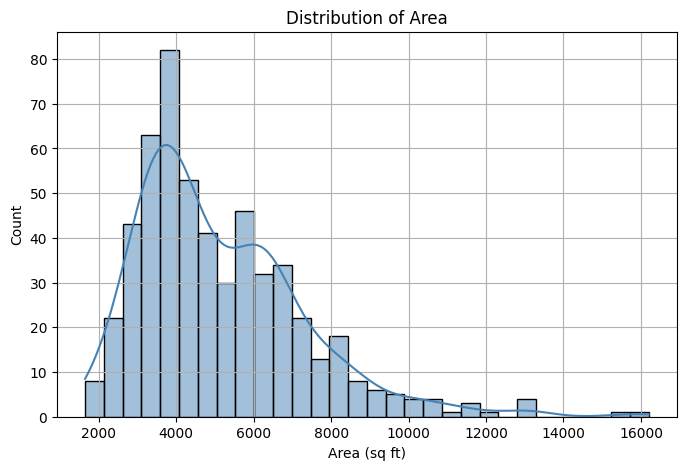

In [163]:
plt.figure(figsize=(8, 5))
sns.histplot(data_house['area'], bins=30, kde=True, color='steelblue')
plt.title("Distribution of Area")
plt.xlabel("Area (sq ft)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

/var/folders/50/0nhbb17x7qq2y8j1r2hw2q_00000gn/T/ipykernel_91546/4266132144.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


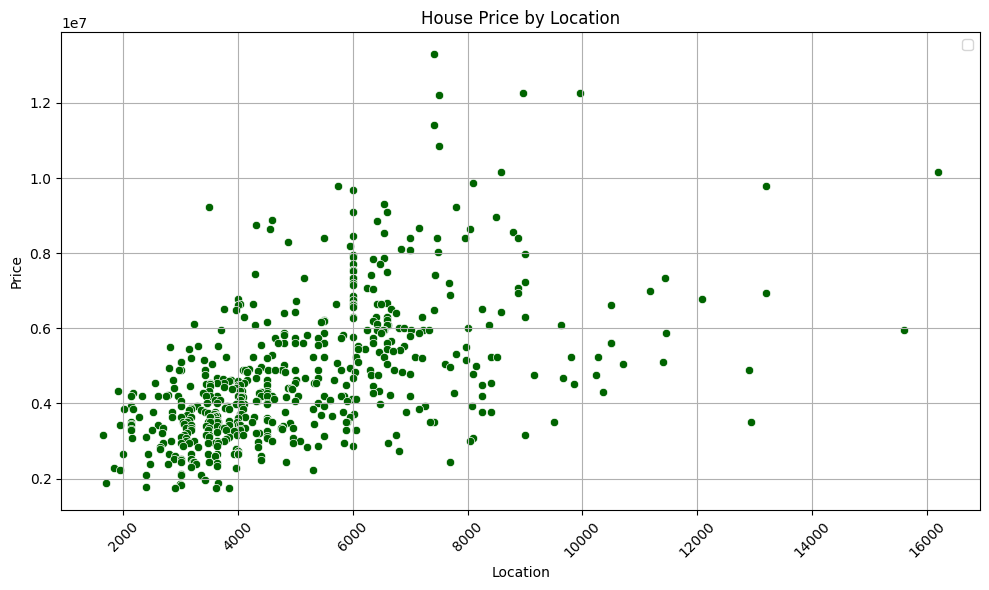

In [164]:
# giá nhà so với khu vực
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_house['area'], y=data_house['price'], color='darkgreen')
plt.title('House Price by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

/var/folders/50/0nhbb17x7qq2y8j1r2hw2q_00000gn/T/ipykernel_91546/1033725711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='furnishingstatus', data=data_house, palette='viridis')


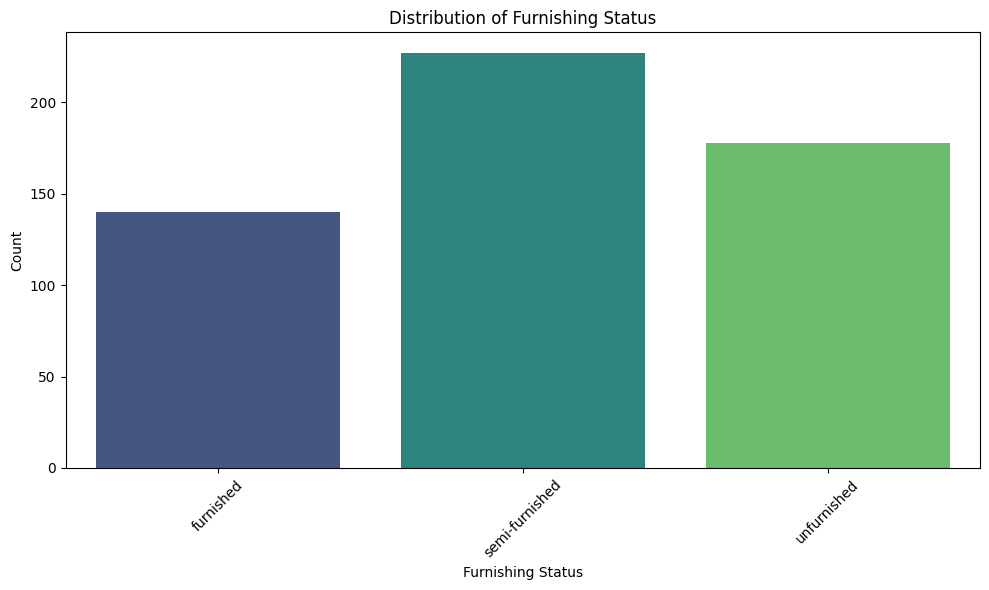

In [165]:
# Trực quan furnishingstatus
plt.figure(figsize=(10, 6))
sns.countplot(x='furnishingstatus', data=data_house, palette='viridis')
plt.title('Distribution of Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

#### Xử lý dữ liệu

In [166]:
data_processed = data_house.copy()

In [167]:
# 1) Xử lý dữ liệu Yes/ No 
# Linear Regression có thể xử lý tốt các biến nhị phân 0/1 mà không cần thêm encoding.
binary_cols = [
    "mainroad",
    "guestroom",
    "basement",
    "hotwaterheating",
    "airconditioning",
    "prefarea",
]

for col in binary_cols:
    if data_house[col].dtype == object:
        data_processed[col] = data_house[col].map({'yes': 1, 'no': 0})

print(data_processed[binary_cols].head())

   mainroad  guestroom  basement  hotwaterheating  airconditioning  prefarea
0         1          0         0                0                1         1
1         1          0         0                0                1         0
2         1          0         1                0                0         1
3         1          0         1                0                1         1
4         1          1         1                0                1         0


In [168]:
# 2) Xử lý Dữ liệu số có giá trị lớn (area, price)
# Linear Regression rất nhạy với scale → nên chuẩn hóa về trung bình 0, độ lệch chuẩn 1.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_processed['area'] = scaler.fit_transform(data_house[['area']])
data_processed['price'] = scaler.fit_transform(data_house[['price']])

print(data_processed.head())

      price      area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  4.566365  1.046726         4          2        3         1          0   
1  4.004484  1.757010         4          4        4         1          0   
2  4.004484  2.218232         3          2        2         1          0   
3  3.985755  1.083624         4          2        2         1          0   
4  3.554979  1.046726         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished  


In [169]:
# 3) Xử lý phân phối diện tích are, price bị lệch (nhở nhiều, to ít)
# → log(area) sẽ tốt hơn area
data_processed['area'] = np.log(data_house['area'])
data_processed['price'] = np.log(data_house['price'])

print(data_processed.head())



       price      area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  16.403275  8.911934         4          2        3         1          0   
1  16.321036  9.100526         4          4        4         1          0   
2  16.321036  9.206332         3          2        2         1          0   
3  16.318175  8.922658         4          2        2         1          0   
4  16.250001  8.911934         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished  


In [170]:
# 4) Xử lý dữ liệu rời rạc (Số phòng ngủ, số phòng tắm,...) 
# Không cần vì nó là dữ liệu tuyến tính (số phòng càng nhiều, giá càng cao)
# 5) Xử lý cột dữ liệu furnishingstatus (gồm 3 loại: furnished, semi-furnished, unfurnished)
# → one-hot encoding
data_processed = pd.get_dummies(data_processed, columns=['furnishingstatus'], drop_first=True)

print(data_processed.head())


       price      area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  16.403275  8.911934         4          2        3         1          0   
1  16.321036  9.100526         4          4        4         1          0   
2  16.321036  9.206332         3          2        2         1          0   
3  16.318175  8.922658         4          2        2         1          0   
4  16.250001  8.911934         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         Fa

In [171]:
# 6) Convert cột bool thành int
for col in data_processed.columns:
    if data_processed[col].dtype == bool:
        data_processed[col] = data_processed[col].astype(int)

print(data_processed.head())


       price      area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  16.403275  8.911934         4          2        3         1          0   
1  16.321036  9.100526         4          4        4         1          0   
2  16.321036  9.206332         3          2        2         1          0   
3  16.318175  8.922658         4          2        2         1          0   
4  16.250001  8.911934         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                                0                           

#### Trích xuất đặc trưng (Feature engineering)

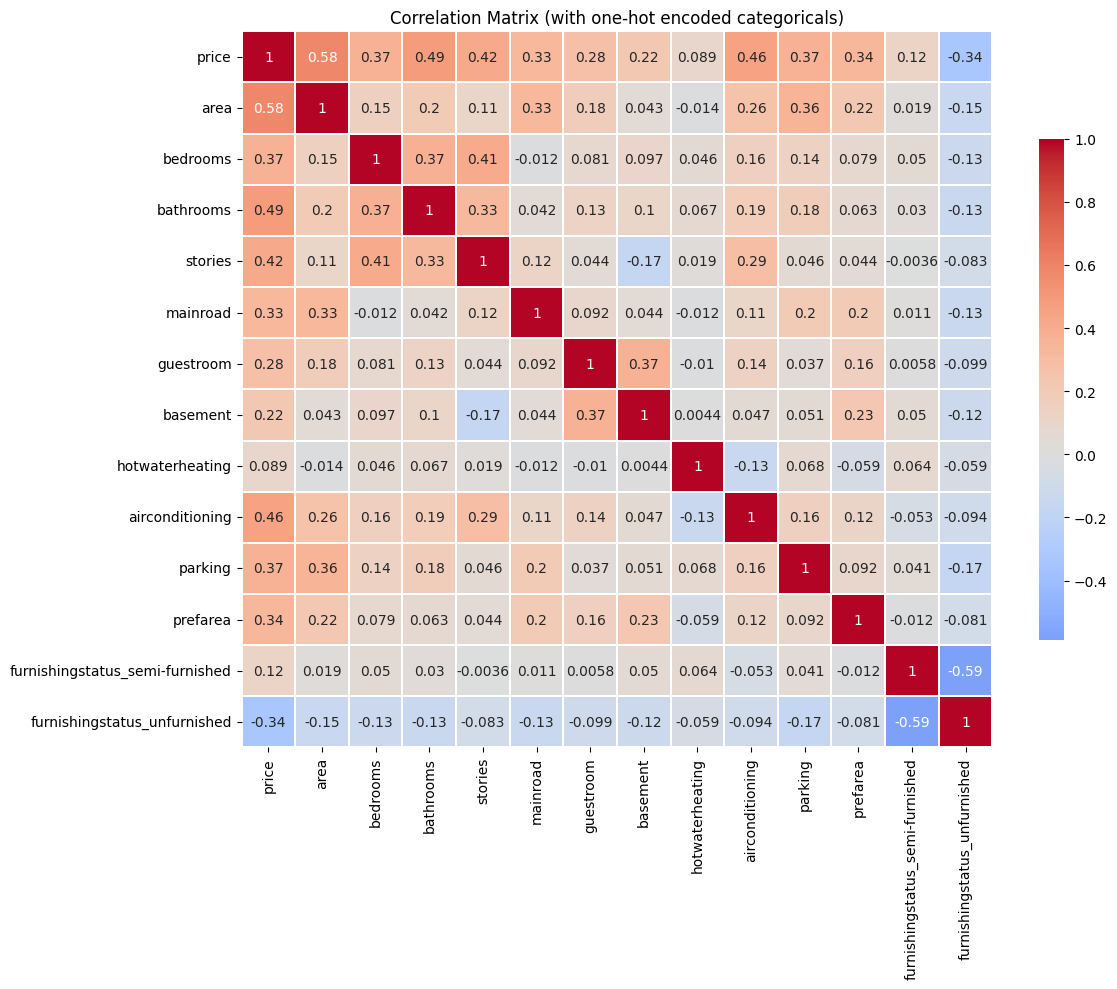

In [172]:
# One-hot encode categorical variables to include them in correlation
_df_enc = pd.get_dummies(data_processed, drop_first=True)

_corr = _df_enc.corr(numeric_only=True)

# Heatmap of full correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(_corr, cmap='coolwarm', center=0, linewidths=0.2, cbar_kws={'shrink': 0.7}, annot=True)
plt.title('Correlation Matrix (with one-hot encoded categoricals)')
plt.tight_layout()
plt.show()



Top 10 features most positively correlated with price:
area               0.580085
bathrooms          0.485715
airconditioning    0.455159
stories            0.415281
parking            0.371638
bedrooms           0.369986
prefarea           0.340557
mainroad           0.330041
guestroom          0.277047
basement           0.218401
Name: price, dtype: float64


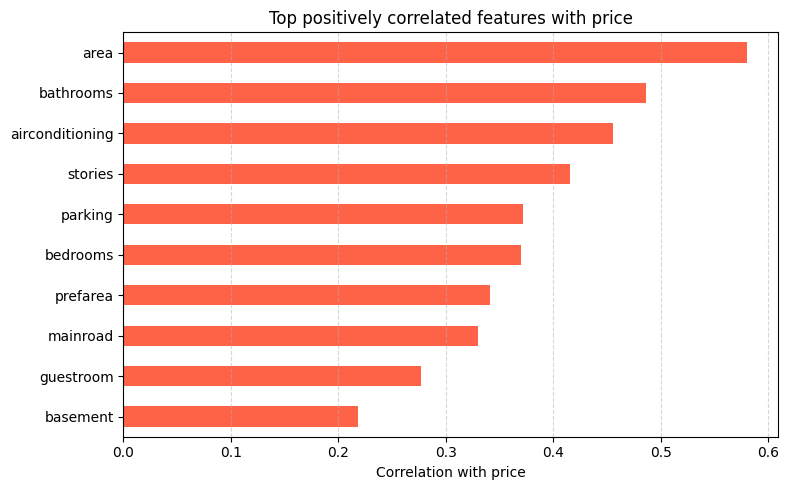

In [173]:
_target_corr = _corr['price'].drop('price', errors='ignore').sort_values(ascending=False)
print('\nTop 10 features most positively correlated with price:')
print(_target_corr.head(10))

plt.figure(figsize=(8, 5))
_top_pos = _target_corr.head(10)[::-1]
_top_pos.plot(kind='barh', color='tomato')
plt.xlabel('Correlation with price')
plt.title('Top positively correlated features with price')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [174]:
# Chia dữ liệu thành tập train và test
from sklearn.model_selection import train_test_split

X = data_processed.drop('price', axis=1)
y = data_processed['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(436, 13) (109, 13) (436,) (109,)


In [175]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
print(X_train.head())
print(X_test.head())



         area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
46   8.699515         3          2        4         1          0         0   
93   8.881836         3          2        1         1          0         1   
335  8.246958         2          1        1         1          0         1   
412  7.867106         3          1        2         1          0         1   
471  8.229511         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  \
46                 0                1        1         0   
93                 0                1        3         0   
335                0                1        2         0   
412                0                0        0         1   
471                0                0        0         0   

     furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
46                                 0                             0  
93                              

#### Sử dụng Linear Regression bằng thư viện Scikit-learn

In [204]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [209]:
lr_pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("lr", LinearRegression())
])

lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2 :", r2)

MSE: 0.06212936343503209
R2 : 0.6782341334497208


In [213]:
# 12. Sample predictions peek
sample = pd.DataFrame({
    "Actual_price": y_test,
    "Predicted_price": y_pred,
}).head(10)
print(f"Hold-out R² (log-space): {r2:.4f}")
print(f"Hold-out RMSE (rupees): {mse:,.4f}")
print("\nSample predictions:")
print(sample.to_string(index=False, formatters={
    "Actual_price": "{:,.4f}".format,
    "Predicted_price": "{:,.4f}".format,
}))

Hold-out R² (log-space): 0.6782
Hold-out RMSE (rupees): 0.0621

Sample predictions:
Actual_price Predicted_price
     15.2167         15.3754
     15.7101         15.8117
     15.1265         15.0164
     15.6780         15.3282
     14.8451         15.0358
     15.4047         15.0777
     15.4737         15.4746
     15.3291         15.6658
     14.7116         14.8217
     15.0254         14.8336


#### Lưu mô hình

In [211]:
# Save trained model and training columns for later use
import os
import joblib

models_dir = os.path.join('..', 'models')
os.makedirs(models_dir, exist_ok=True)
feature_names = X_train.columns.tolist()
artifact = {
    'model': lr_pipe,                # trained sklearn LinearRegression
    'columns': feature_names,   # training feature order
}


model_path = os.path.join(models_dir, 'linear_regression.pkl')
joblib.dump(artifact, model_path)
print('Saved to:', model_path)


Saved to: ../models/linear_regression.pkl


In [212]:
# Load model and predict on new data (example)
import pandas as pd
import numpy as np
import joblib

artifact = joblib.load(os.path.join('..', 'models', 'linear_regression.pkl'))
loaded_model = artifact['model']
train_columns = artifact['columns']

# Suppose new_df is a new dataframe with same raw schema as training X
# new_df = pd.read_csv('path_to_new_data.csv')
# Ensure its columns match training order; add missing columns with 0

def align_columns(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    df_aligned = df.reindex(columns=columns, fill_value=0)
    return df_aligned

# Example: reuse X_test as "new data"
new_df = X_test.copy()
new_df_aligned = align_columns(new_df, train_columns)


new_pred = loaded_model.predict(new_df_aligned)
print('Sample predictions:', new_pred[:5])


Sample predictions: [15.37542337 15.81170585 15.01637622 15.32820354 15.03584386]
